In [74]:
import os, sys, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## NOTE: So far just withdrawl fees so means nth yet

In [14]:
#https://stackoverflow.com/questions/61732956/pandas-read-json-with-int64-values-raises-valueerror-value-is-too-big
# monkeypatch using faster simplejson module
import simplejson
pd.io.json._json.loads = lambda s, *a, **kw: simplejson.loads(s)

# normalising (unnesting) at the same time (for nested jsons)
# pd.io.json._json.loads = lambda s, *a, **kw: pd.json_normalize(simplejson.loads(s))

In [20]:
# block_json = pd.read_json("transfer.json")
fname = "transfer.json"
block_json = json.load(open(fname, "rt"))

In [21]:
block_json

{'last_scanned_block': 9169335,
 'blocks': {'8400384': {'0xd2fd00e4330607556c80e7fb7468b8f5769e0b192520b3c78ac65b6a4fd7daab': {'264': {'user': '0xC1aD2FDBd9486272F60dCe02040D753079AA9A1a',
     'amount': 1049839102072119085930,
     'withdrawalFee': 5275573377246829577,
     'timestamp': '2021-06-18T09:34:05'}}},
  '8400471': {'0x18d726a46c88a2fea3fddf661cbc8cae8b9210eb26fa1a09c5ea504b690ede40': {'391': {'user': '0xa6f62F80369D311Ec17941E20c8dD4f47F212E9B',
     'amount': 49750000000000000000,
     'withdrawalFee': 250000000000000000,
     'timestamp': '2021-06-18T09:38:26'}}},
  '8400482': {'0x2537f080ac0c806efcf13b05f96d9358f931a8757cc3089369a55f89057d39f9': {'409': {'user': '0xa6f62F80369D311Ec17941E20c8dD4f47F212E9B',
     'amount': 49750000000000000000,
     'withdrawalFee': 250000000000000000,
     'timestamp': '2021-06-18T09:38:59'}}},
  '8400489': {'0xde80befa2837ca57895d50d278ecedec9f358dcb56806d0f9d4f49b3fb08c6dc': {'147': {'user': '0xa6f62F80369D311Ec17941E20c8dD4f47F212E9B'

In [22]:
blocks = block_json["blocks"]

In [25]:
def wei2ether(w):
    return w / 1e18

In [132]:
withDrawlFee, amount = np.array([]), np.array([])
timestamp, user = np.array([]), np.array([])

block_k = list(blocks.keys())[:60000]
# print(block_k)
for k in block_k:
#     print(k)
    v = blocks[k]
#     print(v)
    for k1,v1 in v.items():
#         print(v1)
        for k2,v2 in v1.items():
#             print()
            withDrawlFee = np.append(withDrawlFee,wei2ether(v2['withdrawalFee']))
            amount = np.append(amount,wei2ether(v2['amount']))
            timestamp = np.append(timestamp,v2['timestamp'])
            user = np.append(user,v2['user'])

In [133]:
len(amount)

10461

In [134]:
len(withDrawlFee)

10461

In [135]:
len(user)

10461

In [136]:
datetime_objs = [datetime.fromisoformat(t) for t in timestamp]

In [137]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

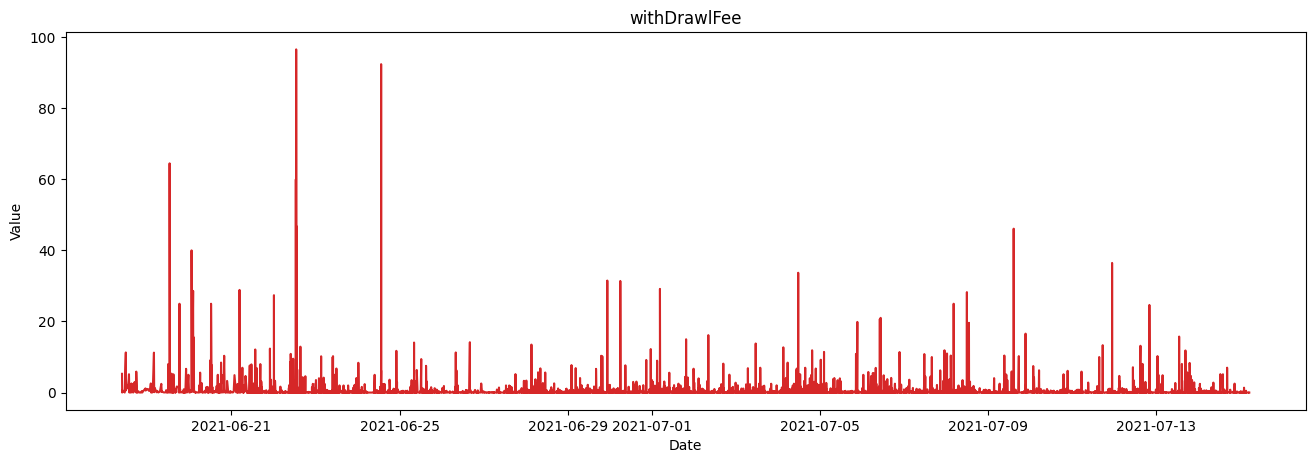

In [138]:
title = "withDrawlFee"
y = withDrawlFee
x = [b for b in range(len(withDrawlFee))]
plot_df(x=datetime_objs, y=y, title=title)

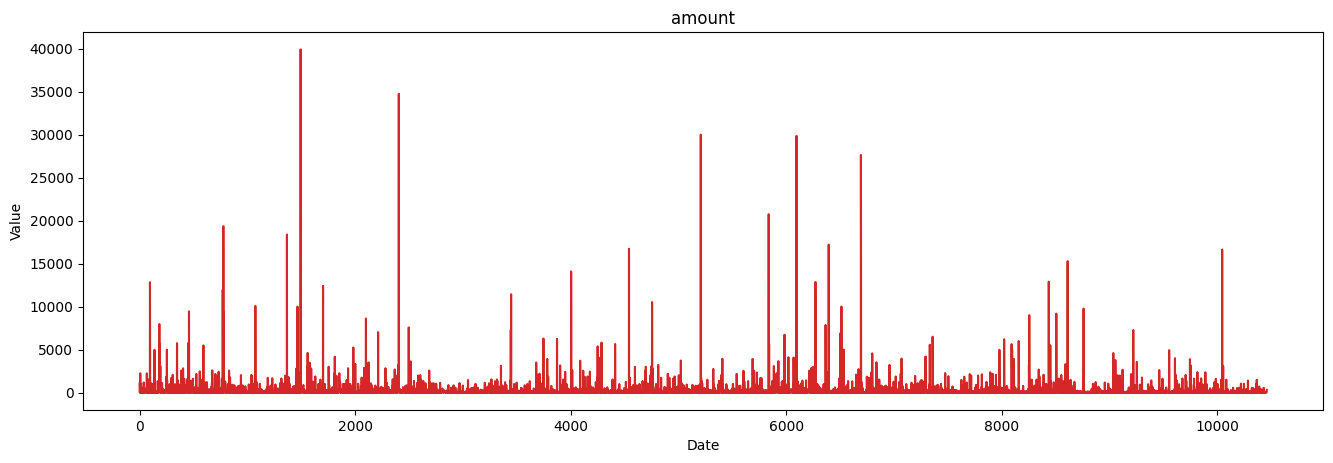

In [139]:
title = "amount"
y = amount
x = [b for b in range(len(withDrawlFee))]
plot_df(x=x, y=y, title=title)

In [140]:
len(user)

10461

In [141]:
d = {
    "amount":amount,
    "user": user
}
block_df = pd.DataFrame(data=d,index=pd.DatetimeIndex(datetime_objs),columns=["amount","user"])

In [142]:
block_df.describe(include="all")

,amount,user
count,1.046100e+04,10461
unique,NaN,7444
top,NaN,0x7E13e8355C63E4f91B06032Bb5a3DaA7da171A20
freq,NaN,17
mean,2.087149e+02,NaN
std,1.075507e+03,NaN
min,1.000000e-18,NaN
25%,7.887141e+00,NaN
50%,3.000000e+01,NaN
75%,1.015503e+02,NaN


In [144]:
whales = block_df[block_df["amount"] > 3000]

In [145]:
whales["amount"].value_counts()

10000.000000    2
4975.000000     2
6502.694599     1
5632.872573     1
5694.309368     1
               ..
7292.956207     1
3221.672765     1
9451.515560     1
4597.468051     1
39927.875149    1
Name: amount, Length: 100, dtype: int64

In [151]:
user = whales[whales["amount"] == whales["amount"].max()]['user'].tolist()[0]   #whales["amount"].max()

In [153]:
user_df = block_df[block_df['user'] == user]
user_df.describe(include="all")

,amount,user
count,1.000000,1
unique,NaN,1
top,NaN,0x514826fb77bB3cc5b3F1Fa9a7031791ea4539A78
freq,NaN,1
mean,39927.875149,NaN
std,NaN,NaN
min,39927.875149,NaN
25%,39927.875149,NaN
50%,39927.875149,NaN
75%,39927.875149,NaN


In [154]:
block_df["user"].value_counts()

0x7E13e8355C63E4f91B06032Bb5a3DaA7da171A20    17
0x2a067fEB63E7e8693d6931032F01848935021a29    17
0x3665113F6922b72876f7545bE85E486F8C45F4Bd    16
0x9bA882C653c6B3a079254b838d7C4a4EC6D29C65    16
0x713C1E1997547A45b3FaAAb32F72e0E04cBC28FD    14
                                              ..
0x60A64b55E804E71cB047053211A63FB314b115B8     1
0xeD8853FFc7e23F2856e6C97BA174933532E73Cf3     1
0x1F470851549B1a9c736AdFB9B92701624E8F9D8d     1
0x4D3B77d6474839992De1ECFBD614e83caD05D972     1
0xcD212C34DC4a916f609637b3CaC7876E4741128F     1
Name: user, Length: 7444, dtype: int64

In [155]:
user_df = block_df[block_df["user"] == "0x7E13e8355C63E4f91B06032Bb5a3DaA7da171A20"]

In [156]:
user_df.describe(include="all")

,amount,user
count,17.000000,17
unique,NaN,1
top,NaN,0x7E13e8355C63E4f91B06032Bb5a3DaA7da171A20
freq,NaN,17
mean,39.220785,NaN
std,28.853409,NaN
min,2.985000,NaN
25%,19.900000,NaN
50%,43.780000,NaN
75%,50.000000,NaN


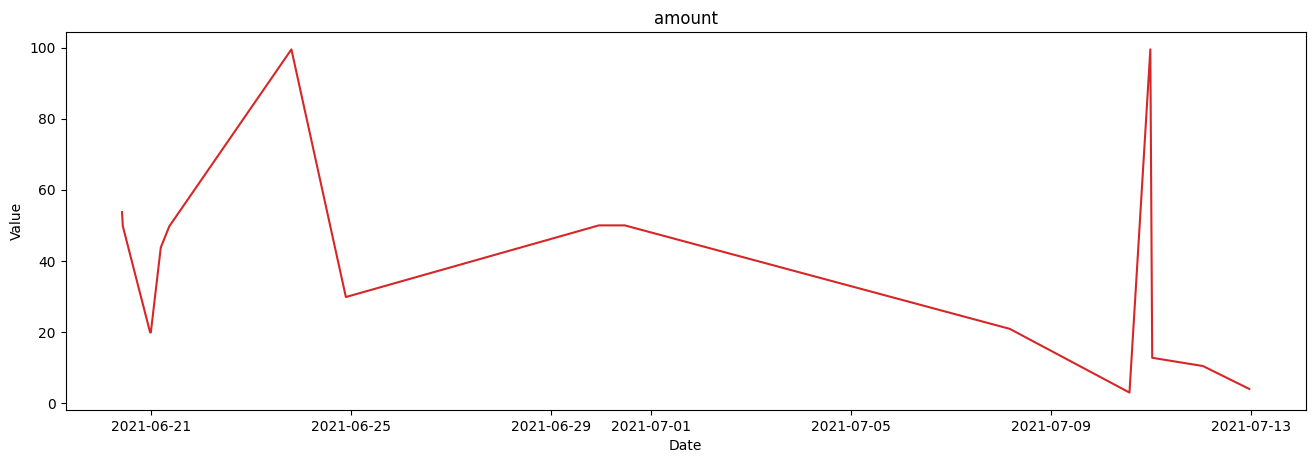

In [157]:
title = "amount"
y = user_df["amount"]
x = user_df.index
plot_df(x=x, y=y, title=title)

## Now check against the eth price on these days,esp with those large transactions